In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# set sns plot 
sns.set_theme()
sns.set_theme(style="whitegrid")
sns.set_context("talk")
plt.rcParams['axes.facecolor'] = 'white'    # Plot area background
plt.rcParams['figure.facecolor'] = 'white'  # Outside plot area (whole figure)

In [47]:
groq_accuracies = [
    0.8000, 0.8000, 0.8000, 0.9200, 0.8400, 0.8000, 0.8400, 0.9200, 0.8000, 0.7600,
    0.7600, 0.6800, 0.6000, 0.9200, 0.7200, 0.8800, 0.5200, 0.8000, 0.5600, 0.9200,
    0.7200, 0.8000
] 

gemini_accuracies = [0.88, 0.8, 0.8, 0.92, 0.96, 0.84, 0.88, 0.96, 0.84, 0.84, 0.96, 0.68, 0.64, 0.92, 0.72, 0.88, 0.52, 0.8, 0.56, 0.92, 0.8, 0.8]

In [48]:
df = pd.DataFrame({"Batch": range(1,len(groq_accuracies)+1),"Groq": groq_accuracies, "Gemini": gemini_accuracies})
melted = df.melt(id_vars="Batch", value_vars=["Groq", "Gemini"], var_name="Model", value_name="Accuracy")

In [28]:
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']

palette = {"Groq": "green", "Gemini": "red"}

In [50]:
melted

,Batch,Model,Accuracy
0,1,Groq,0.80
1,2,Groq,0.80
2,3,Groq,0.80
3,4,Groq,0.92
4,5,Groq,0.84
5,6,Groq,0.80
6,7,Groq,0.84
7,8,Groq,0.92
8,9,Groq,0.80
9,10,Groq,0.76


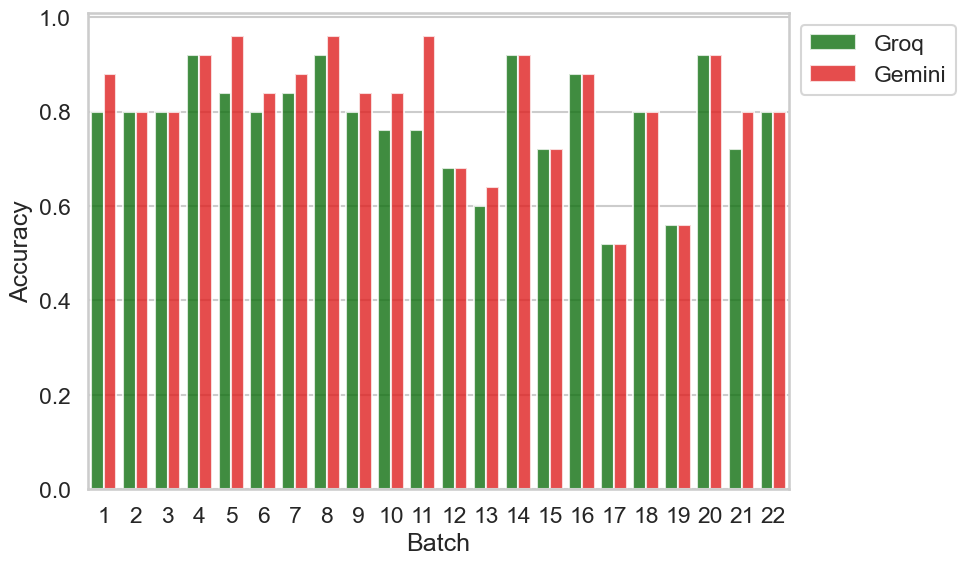

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data=melted, x="Batch", y="Accuracy", hue="Model", palette=palette, alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import confusion_matrix, f1_score

batch_size = 22
path = "../Results/Preliminary Results/Gemini Results/gemini_batch"

batch_results = []

for i in range(1, batch_size + 1):
    file_path = f"{path}{i}.csv"
    
    # Read CSV
    df = pd.read_csv(file_path)
    
    y_true = df["y"]
    y_pred = df["pred_label"]
    
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    
    TN, FP, FN, TP = cm.ravel()
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1 = f1_score(y_true, y_pred, average="binary", zero_division=0)
    
    iou = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
    
    batch_results.append({
        "batch": i,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "IoU": iou
    })

results_df = pd.DataFrame(batch_results)

print(results_df)

mean_metrics = results_df[["Precision", "Recall", "F1", "IoU"]].mean()
print("\nMean Metrics Across All Batches:")
print(mean_metrics)


    batch  TP  FP  FN  TN  Precision    Recall        F1       IoU
0       1   3   3   0  19   0.500000  1.000000  0.666667  0.500000
1       2   6   5   0  14   0.545455  1.000000  0.705882  0.545455
2       3   2   5   0  18   0.285714  1.000000  0.444444  0.285714
3       4   1   2   0  22   0.333333  1.000000  0.500000  0.333333
4       5   0   1   0  24   0.000000  0.000000  0.000000  0.000000
5       6   2   3   1  19   0.400000  0.666667  0.500000  0.333333
6       7   2   3   0  20   0.400000  1.000000  0.571429  0.400000
7       8   1   1   0  23   0.500000  1.000000  0.666667  0.500000
8       9   4   4   0  17   0.500000  1.000000  0.666667  0.500000
9      10   3   3   1  18   0.500000  0.750000  0.600000  0.428571
10     11   0   1   0  24   0.000000  0.000000  0.000000  0.000000
11     12   1   8   0  16   0.111111  1.000000  0.200000  0.111111
12     13   2   9   0  14   0.181818  1.000000  0.307692  0.181818
13     14   4   2   0  19   0.666667  1.000000  0.800000  0.66

In [13]:
from sklearn.metrics import confusion_matrix, f1_score

batch_size = 22
path = "../Results/Preliminary Results/Groq Results/groq_batch"

batch_results = []

for i in range(1, batch_size + 1):
    file_path = f"{path}{i}.csv"
    
    # Read CSV
    df = pd.read_csv(file_path)
    
    y_true = df["y"]
    y_pred = df["pred_label"]
    
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    
    TN, FP, FN, TP = cm.ravel()
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1 = f1_score(y_true, y_pred, average="binary", zero_division=0)
    
    iou = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
    
    batch_results.append({
        "batch": i,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "IoU": iou
    })

results_df = pd.DataFrame(batch_results)

print(results_df)

mean_metrics = results_df[["Precision", "Recall", "F1", "IoU"]].mean()
print("\nMean Metrics Across All Batches:")
print(mean_metrics)


    batch  TP  FP  FN  TN  Precision    Recall        F1       IoU
0       1   3   5   0  17   0.375000  1.000000  0.545455  0.375000
1       2   6   5   0  14   0.545455  1.000000  0.705882  0.545455
2       3   2   5   0  18   0.285714  1.000000  0.444444  0.285714
3       4   1   2   0  22   0.333333  1.000000  0.500000  0.333333
4       5   0   4   0  21   0.000000  0.000000  0.000000  0.000000
5       6   2   4   1  18   0.333333  0.666667  0.444444  0.285714
6       7   2   4   0  19   0.333333  1.000000  0.500000  0.333333
7       8   1   2   0  22   0.333333  1.000000  0.500000  0.333333
8       9   4   5   0  16   0.444444  1.000000  0.615385  0.444444
9      10   3   5   1  16   0.375000  0.750000  0.500000  0.333333
10     11   0   6   0  19   0.000000  0.000000  0.000000  0.000000
11     12   1   8   0  16   0.111111  1.000000  0.200000  0.111111
12     13   2  10   0  13   0.166667  1.000000  0.285714  0.166667
13     14   4   2   0  19   0.666667  1.000000  0.800000  0.66

# Transformation recreation

In [19]:
gemini = [80, 84, 84, 56, 32, 36, 36, 52, 60, 60, 84, 32, 24, 48, 48, 48, 60, 56, 56, 32]
gemini = [x/100 for x in gemini]

# Groq accuracy percentages
groq = [60, 28, 32, 24, 4, 24, 4, 20, 16, 24, 12, 4, 12, 8, 12, 4, 24, 20, 24, 12]
groq = [x/100 for x in groq]

# Batch numbers (1-20)
batches = list(range(1, 21))

In [22]:
transformation_rate_df = pd.DataFrame({
    'Batch': batches,
    'Gemini': gemini,
    'Groq': groq
})

In [23]:
transformation_rate_df


,Batch,Gemini,Groq
0,1,0.80,0.60
1,2,0.84,0.28
2,3,0.84,0.32
3,4,0.56,0.24
4,5,0.32,0.04
5,6,0.36,0.24
6,7,0.36,0.04
7,8,0.52,0.20
8,9,0.60,0.16
9,10,0.60,0.24


In [24]:
melted = transformation_rate_df.melt(id_vars="Batch", value_vars=["Groq", "Gemini"], var_name="Model", value_name="Accuracy")

In [25]:
melted

,Batch,Model,Accuracy
0,1,Groq,0.60
1,2,Groq,0.28
2,3,Groq,0.32
3,4,Groq,0.24
4,5,Groq,0.04
5,6,Groq,0.24
6,7,Groq,0.04
7,8,Groq,0.20
8,9,Groq,0.16
9,10,Groq,0.24


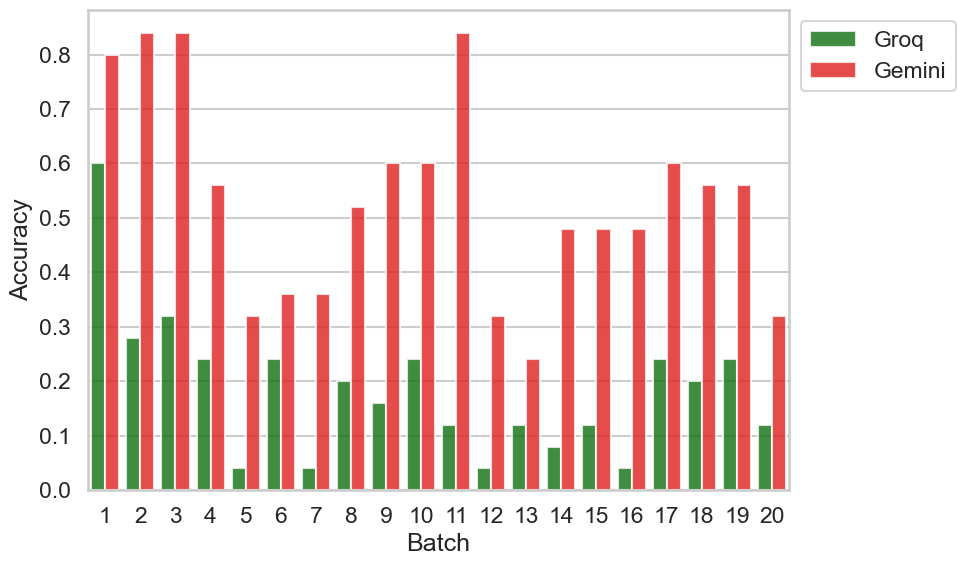

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=melted, x="Batch", y="Accuracy", hue="Model", palette=palette, alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=True)
plt.tight_layout()
plt.show()